# Challenge Problem Week 1

Hepatitis B (HEP B) is a liver infection caused by the hepatitis B virus (HBV). The infection causes inflammation of the liver and if not properly treated, the virus can lead to liver disease such as cirrhosis or liver cancer. 
HEP B is the most primary causes of liver cancer, the one of the leading cause of cancer deaths in the world, therfore making it a major global health problem. HEP B is up to 100 times more infectious than the HIV/AIDS virus. Two billion people (1 in 3) have been infected and more than 292 million people are living with a chronic hepatitis B infection. Although HEP B is treatable and preventable about 884,000 people die each year.

The virus is transmitted through the blood and infected bodily fluids. It can be passed to others through direct contact with blood, unprotected sex, use of illegal drugs, unsterilized or contaminated needles, and from an infected woman to her newborn during pregnancy or childbirth. Most people do not show symptoms and the only way to know you are infected is by getting tested.

![hepb](https://images.onhealth.com/images/slideshow/hepatitis-s1-liver-hepatitis-virus.jpg)

**Goal**: Use the NHANES data set to predict whether a patient has HEP B or not. We want to determine which attributes are the most meaningful to the predictive models. We want to create a balanced model that can predict with a high sensitivity and high specificity while using the **least amount of features**. Essentially is there a way to identify the population of those infected without testing them? 

Source: https://www.hepb.org/what-is-hepatitis-b/what-is-hepb/ 

# National Health and Nutrition Examination Survey NHANES 
To investigate our research problem we will be using the NHANES database. NHANES is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. The survey examines a nationally representative sample of about 5,000 persons each year. These persons are located in counties across the country, 15 of which are visited each year. The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel.

Source: Centers for Disease Control and Prevention (CDC). National Center for Health Statistics (NCHS). National Health and Nutrition Examination Survey Data. Hyattsville, MD: U.S. Department of Health and Human Services, Centers for Disease Control and Prevention, [2019][https://www.cdc.gov/nchs/nhanes/about_nhanes.htm#data].

Below are some general steps to begin analyzing this problem. Apply the new material you learned in class and have fun! (:

1. Import the data  
2. Decide what variables are most relevant  
3. Summary statistics of the data  
4. Data Cleaning (Important!) Note this may a tedious process  
a. Missing data  
b. Transform/Normalize data  
4. Data Visualization  
5. Data analysis  
a. Create dummy variables  
b. Create training and test sets  
c. Statistical methodology  
6. Scoring metrics  
confusion matrix, roc curve  


In [3]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import os
from scipy import stats
from urllib import request
from bs4 import BeautifulSoup
from sklearn.impute import SimpleImputer

## Import data
Read in the data set and look at the first ten lines

In [4]:
def load_data(var_code):
    pass

In [5]:
#import data
diagnosis_dataset = pd.read_sas('hepatitisdata/HEQ_I.XPT')
#print(diagnosis_dataset.head())
occupation_dataset = pd.read_sas('hepatitisdata/OCQ_I.XPT')
#print(occupation_dataset.head())
dataset = pd.read_csv('nhanes_yrs5.csv')
# Write your code here

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4161,6598,6599,6601) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#dropping unnecessary variables (don't worry about this)
dataset = dataset[dataset.columns.drop(list(dataset.filter(regex='WT')))]
dataset = dataset[dataset.columns.drop(list(dataset.filter(regex='SDM')))]

Awesome, looks like the data loaded in properly. Let's continue by looking at variables that may be predictive of hepatitis B. For beginners, I would suggest conducting a literature review on previous research of hepatitis B.

## Select Features of Interest


Once you have selected some variables in the NHANES data set only looking at what you are interested in. It is in your best interest to rename the variables.

In [204]:
ind_names = {
    'SEQN': 'Sequence Number',
    'DUQ370': 'Ever use a needle to inject illegal drug',
    'DUQ240': 'Ever used cocaine/heroin/methamphetamine',
    'LBXHIVC': 'HIV Combo Test',
    'DMDHRAGE': 'Age',
    'RIAGENDR': 'Gender',
    
    'INDFMPIR': 'Ratio of family income to poverty',
    'DMDMARTL': 'Marital status',
    'IMQ020': 'Received Hepatitis B 3 dose series',
    'INDFMPIR': 'Family Income Relative to Poverty',
    'SXD101': 'Male Sex Partners',
    'SXD171': 'Female Sex Partners',
    'OCD150': 'Type of work done last week',
    'OCQ260': 'Description of job/work situation',
    'MCQ203': 'Jaundice'
}

ind_vars = list(ind_names.keys())

dep_names = {
    'LBDHBG': 'Hepatitis B surface antigen',
    'LBXHBC': 'Hepatitis B core antibody',
}

dep_vars = list(dep_names.keys())

all_names = {
    **dep_names,
    **ind_names,
}

all_vars = [*dep_vars, *ind_vars]

drug_dat = dataset.loc[:, list(all_names.keys())]

# Supplement missing data
def load_missing(code, url):
    miss_dat = pd.read_sas(url)
    drug_dat.loc[:, code] = miss_dat.loc[:, code]

load_missing('LBXHIVC', 'hepatitisdata/HIV_I.XPT')
load_missing('SXD101', 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SXQ_I.XPT')

# Rename columns and display

drug_dat = drug_dat.rename(columns=all_names)
drug_dat.head(20)

# Write your code here

# create a subset of the data you want to analyze

# rename the variables

,Hepatitis B surface antigen,Hepatitis B core antibody,Sequence Number,Ever use a needle to inject illegal drug,Ever used cocaine/heroin/methamphetamine,HIV Combo Test,Age,Gender,Family Income Relative to Poverty,Marital status,Received Hepatitis B 3 dose series,Male Sex Partners,Female Sex Partners,Type of work done last week,Description of job/work situation,Jaundice
0,2.0,2.0,41475,2.0,2.0,2.0,64,2,1.83,1.0,3,NaN,NaN,4.0,NaN,NaN
1,2.0,2.0,41476,NaN,NaN,2.0,51,2,5.00,NaN,1,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,41477,NaN,NaN,2.0,71,1,1.50,1.0,3,5.397605e-79,NaN,4.0,NaN,NaN
3,NaN,NaN,41478,NaN,NaN,2.0,25,2,0.66,NaN,1,1.000000e+01,NaN,NaN,NaN,NaN
4,2.0,2.0,41479,2.0,2.0,2.0,52,1,2.20,1.0,1,NaN,NaN,1.0,1.0,NaN
5,NaN,NaN,41480,NaN,NaN,2.0,27,1,0.85,NaN,1,3.000000e+00,NaN,NaN,NaN,NaN
6,NaN,NaN,41481,2.0,2.0,2.0,51,1,1.63,5.0,1,NaN,60.0,3.0,NaN,NaN
7,2.0,2.0,41482,2.0,9.0,2.0,37,1,4.01,1.0,3,NaN,77777.0,1.0,1.0,NaN
8,2.0,2.0,41483,2.0,2.0,2.0,55,1,1.14,1.0,3,NaN,3.0,4.0,NaN,NaN
9,NaN,NaN,41484,NaN,NaN,2.0,30,1,0.52,NaN,1,NaN,NaN,NaN,NaN,NaN


Remember the goal is to create a balanced model that can predict with a high sensitivity and high specificity while using the **least amount of features**. Next, we will look at some summary statistics of the variables you chose.

Eliminate dependent NaNs

In [205]:
for dep in dep_names.values():
    drug_dat = drug_dat[np.isfinite(drug_dat[dep])]
drug_dat.head(20)

,Hepatitis B surface antigen,Hepatitis B core antibody,Sequence Number,Ever use a needle to inject illegal drug,Ever used cocaine/heroin/methamphetamine,HIV Combo Test,Age,Gender,Family Income Relative to Poverty,Marital status,Received Hepatitis B 3 dose series,Male Sex Partners,Female Sex Partners,Type of work done last week,Description of job/work situation,Jaundice
0,2.0,2.0,41475,2.0,2.0,2.0,64,2,1.83,1.0,3,NaN,NaN,4.0,NaN,NaN
1,2.0,2.0,41476,NaN,NaN,2.0,51,2,5.00,NaN,1,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,41477,NaN,NaN,2.0,71,1,1.50,1.0,3,5.397605e-79,NaN,4.0,NaN,NaN
4,2.0,2.0,41479,2.0,2.0,2.0,52,1,2.20,1.0,1,NaN,NaN,1.0,1.0,NaN
7,2.0,2.0,41482,2.0,9.0,2.0,37,1,4.01,1.0,3,NaN,77777.0,1.0,1.0,NaN
8,2.0,2.0,41483,2.0,2.0,2.0,55,1,1.14,1.0,3,NaN,3.0,4.0,NaN,NaN
10,2.0,2.0,41485,2.0,2.0,2.0,30,2,1.01,1.0,9,6.000000e+00,NaN,1.0,1.0,NaN
11,2.0,2.0,41486,2.0,2.0,NaN,67,2,1.75,1.0,3,2.000000e+00,NaN,4.0,NaN,NaN
12,2.0,1.0,41487,2.0,2.0,2.0,26,1,5.00,5.0,1,NaN,NaN,1.0,1.0,NaN
14,2.0,2.0,41489,2.0,2.0,2.0,40,2,2.15,1.0,2,3.000000e+00,NaN,1.0,4.0,NaN


In [206]:
100 * drug_dat.isna().sum() / drug_dat.shape[0]

Hepatitis B surface antigen                   0.000000
Hepatitis B core antibody                     0.000000
Sequence Number                               0.000000
Ever use a needle to inject illegal drug     46.558704
Ever used cocaine/heroin/methamphetamine     46.558704
HIV Combo Test                               63.954116
Age                                           0.000000
Gender                                        0.000000
Family Income Relative to Poverty             8.232119
Marital status                               27.894737
Received Hepatitis B 3 dose series            0.000000
Male Sex Partners                            78.582996
Female Sex Partners                          77.665317
Type of work done last week                  20.674764
Description of job/work situation            57.327935
Jaundice                                    100.000000
dtype: float64

## View summary statistics
Some useful functions in pandas are describe() and info()

In [196]:
drug_dat.describe()

,Hepatitis B surface antigen,Hepatitis B core antibody,Sequence Number,Ever use a needle to inject illegal drug,Ever used cocaine/heroin/methamphetamine,HIV Combo Test,Age,Gender,Ratio of family income to poverty,Marital status,Received Hepatitis B 3 dose series,Male Sex Partners,Female Sex Partners,Type of work done last week,Description of job/work situation
count,7410.000000,7410.000000,7410.000000,3960.000000,3960.000000,2671.000000,7410.000000,7410.000000,6800.000000,5343.000000,7410.000000,1.587000e+03,1655.000000,5878.000000,3162.000000
mean,1.997976,1.952497,46562.264372,1.989141,1.871465,1.995507,48.597301,1.501889,2.378160,2.415684,2.780297,2.168834e+02,1520.656798,2.386696,2.069260
std,0.044950,0.212727,2935.861929,0.381610,0.644321,0.066889,16.358278,0.500030,1.601044,2.053741,2.249588,4.207213e+03,11706.929370,1.468635,5.533191
min,1.000000,1.000000,41475.000000,1.000000,1.000000,1.000000,18.000000,1.000000,0.000000,1.000000,1.000000,5.397605e-79,0.000000,1.000000,1.000000
25%,2.000000,2.000000,44024.250000,2.000000,2.000000,2.000000,36.000000,1.000000,1.020000,1.000000,1.000000,1.000000e+00,3.000000,1.000000,1.000000
50%,2.000000,2.000000,46567.500000,2.000000,2.000000,2.000000,47.000000,2.000000,1.940000,1.000000,3.000000,4.000000e+00,8.000000,1.000000,1.000000
75%,2.000000,2.000000,49120.750000,2.000000,2.000000,2.000000,61.000000,2.000000,3.770000,4.000000,3.000000,8.000000e+00,20.000000,4.000000,2.000000
max,2.000000,2.000000,51623.000000,9.000000,9.000000,2.000000,80.000000,2.000000,5.000000,77.000000,9.000000,9.999900e+04,99999.000000,7.000000,99.000000


Note the data types are float64, int64 or objects--if there are columns that are obviously numeric like Age but show as objects (or vice versa), we need to change.

## Data Cleaning

Ensure that numeric and categorical variables are coded correctly (turn numeric from strings to numbers).

In [197]:
print(drug_dat.dtypes)

Hepatitis B surface antigen                 float64
Hepatitis B core antibody                   float64
Sequence Number                               int64
Ever use a needle to inject illegal drug    float64
Ever used cocaine/heroin/methamphetamine    float64
HIV Combo Test                              float64
Age                                           int64
Gender                                        int64
Ratio of family income to poverty           float64
Marital status                              float64
Received Hepatitis B 3 dose series            int64
Male Sex Partners                           float64
Female Sex Partners                         float64
Type of work done last week                 float64
Description of job/work situation           float64
dtype: object


Convert Unknowns and Refusals to Nas

Notice the counts for the columns are different because of missing values therefore you will have to figure out how to remediate that issue..some suggestions are found in https://scikit-learn.org/stable/modules/impute.html#impute

In [198]:
# Write your code here
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(drug_dat)
imp_drug_dat = imputer.transform(drug_dat)

imp_drug_dat_df = pd.DataFrame(imp_drug_dat, columns=list(all_names.values()))
imp_drug_dat_df.head(20)
# remove, impute, some remedial procedure for NAs 


,Hepatitis B surface antigen,Hepatitis B core antibody,Sequence Number,Ever use a needle to inject illegal drug,Ever used cocaine/heroin/methamphetamine,HIV Combo Test,Age,Gender,Ratio of family income to poverty,Marital status,Received Hepatitis B 3 dose series,Male Sex Partners,Female Sex Partners,Type of work done last week,Description of job/work situation
0,2.0,2.0,41475.0,2.0,2.0,2.0,64.0,2.0,1.83,1.0,3.0,4.000000e+00,8.0,4.0,1.0
1,2.0,2.0,41476.0,2.0,2.0,2.0,51.0,2.0,5.00,1.0,1.0,4.000000e+00,8.0,1.0,1.0
2,2.0,2.0,41477.0,2.0,2.0,2.0,71.0,1.0,1.50,1.0,3.0,5.397605e-79,8.0,4.0,1.0
3,2.0,2.0,41479.0,2.0,2.0,2.0,52.0,1.0,2.20,1.0,1.0,4.000000e+00,8.0,1.0,1.0
4,2.0,2.0,41482.0,2.0,9.0,2.0,37.0,1.0,4.01,1.0,3.0,4.000000e+00,77777.0,1.0,1.0
5,2.0,2.0,41483.0,2.0,2.0,2.0,55.0,1.0,1.14,1.0,3.0,4.000000e+00,3.0,4.0,1.0
6,2.0,2.0,41485.0,2.0,2.0,2.0,30.0,2.0,1.01,1.0,9.0,6.000000e+00,8.0,1.0,1.0
7,2.0,2.0,41486.0,2.0,2.0,2.0,67.0,2.0,1.75,1.0,3.0,2.000000e+00,8.0,4.0,1.0
8,2.0,1.0,41487.0,2.0,2.0,2.0,26.0,1.0,5.00,5.0,1.0,4.000000e+00,8.0,1.0,1.0
9,2.0,2.0,41489.0,2.0,2.0,2.0,40.0,2.0,2.15,1.0,2.0,3.000000e+00,8.0,1.0,4.0


                                          Hepatitis B surface antigen  \
Sequence Number                                             -0.001180   
Ever use a needle to inject illegal drug                     0.009825   
Ever used cocaine/heroin/methamphetamine                    -0.000192   
HIV Combo Test                                              -0.001814   
Age                                                         -0.007717   
Gender                                                       0.021188   
Ratio of family income to poverty                           -0.017895   
Marital status                                              -0.015675   
Received Hepatitis B 3 dose series                          -0.009738   
Male Sex Partners                                            0.001065   
Female Sex Partners                                         -0.051208   
Type of work done last week                                  0.003164   
Description of job/work situation                  

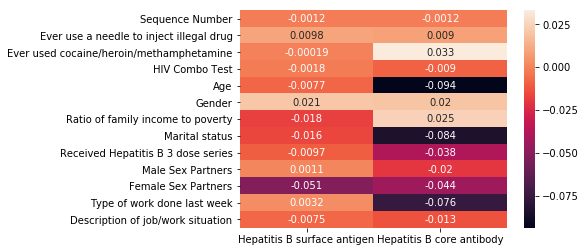

In [199]:
corrs = imp_drug_dat_df.corr().loc[ind_names.values(), dep_names.values()]
print(corrs)
sns.heatmap(corrs, annot=True)

Lastly, we will convert HEP B into indicator variables

In [200]:
# nothing to do?

## Data Analysis and Visualization

Take a look at your data. I would suggest doing univariate, bivariate, and multi-variate analysis of most if not all the features you chose.

       Hepatitis B surface antigen  Hepatitis B core antibody  \
count                  7410.000000                7410.000000   
mean                      1.997976                   1.952497   
std                       0.044950                   0.212727   
min                       1.000000                   1.000000   
25%                       2.000000                   2.000000   
50%                       2.000000                   2.000000   
75%                       2.000000                   2.000000   
max                       2.000000                   2.000000   

       Sequence Number  Ever use a needle to inject illegal drug  \
count      7410.000000                               7410.000000   
mean      46562.264372                                  1.994197   
std        2935.861929                                  0.279006   
min       41475.000000                                  1.000000   
25%       44024.250000                                  2.000000   
50%   

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:2931: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


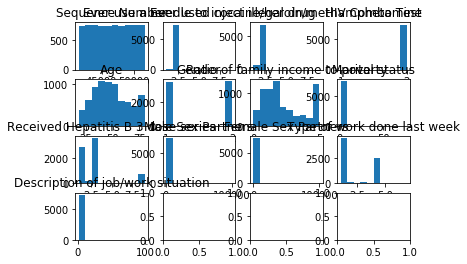

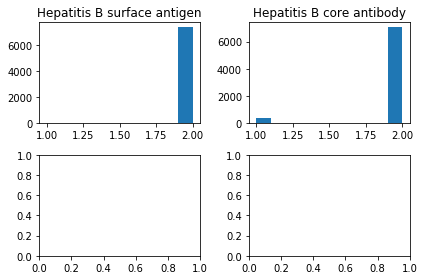

In [201]:
# Single stats

print(imp_drug_dat_df.describe())

print(stats.f_oneway(imp_drug_dat_df))

fig, axs = plt.subplots(int(np.ceil(len(ind_names)**0.5)), int(np.ceil(len(ind_names)**0.5)))
for ind_name, ax in zip(ind_names.values(), axs.reshape(int(np.ceil(len(ind_names)**0.5)**2))):
    ax.set_title(ind_name)
    ax.hist(imp_drug_dat_df[ind_name])
fig.tight_layout()

fig, axs = plt.subplots(int(np.ceil(len(dep_names)**0.5)), int(np.ceil(len(dep_names)**0.5)))
for dep_name, ax in zip(dep_names.values(), axs.reshape(int(np.ceil(len(dep_names)**0.5)**2))):
    ax.set_title(dep_name)
    ax.hist(imp_drug_dat_df[dep_name])
fig.tight_layout()



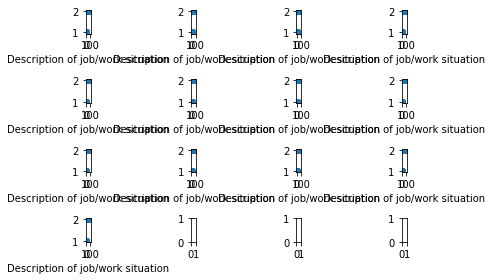

In [203]:

fig, axs = plt.subplots(int(np.ceil(len(ind_names)**0.5)), int(np.ceil(len(ind_names)**0.5)))

for ind_name, ax in zip(ind_names.values(), axs.reshape(int(np.ceil(len(ind_names)**0.5)**2))):
    # For each yes/no/type
    # Count the percentage of drug users
    # Plot that
    uniques = np.array(sorted(imp_drug_dat_df[x_name].unique()))
    means_core = np.array(uniques)
    for i,x_val in enumerate(uniques):
        means_core[i] = imp_drug_dat_df[imp_drug_dat_df[x_name] == x_val]['Hepatitis B surface antigen'].mean()
    #means_core = imp_drug_dat_df[imp_drug_dat_df[x_name] == x_val]['Hepatitis B core antibody'].mean()
    
    ax.plot(uniques, means_core)
    
    ax.set_xlabel(x_name)
    #ax.bar(imp_drug_dat_df[x_name], imp_drug_dat_df['Hepatitis B core antibody'])
    
    ax.scatter(imp_drug_dat_df[x_name], imp_drug_dat_df['Hepatitis B surface antigen'])
fig.tight_layout()

## Preprocessing data

Before we begin to implement a model, we need to prepare the variables that will be used. At this step we convert categorical variables into dummy\indicator variables (https://chrisalbon.com/python/data_wrangling/pandas_convert_categorical_to_dummies/). Additionally, you'll have to normalize and transform variables if necessary.

In [109]:
# Write your code here

## Model training and selection
Now, let's split our data into training and testing in an 80-20 split, stratified by HEPB distribution (this tries to keep the HEPB distribution approximately equal for the training and test set). For consistency, let's use a random seed 0.

In [123]:
# Write your code here

from sklearn.model_selection import train_test_split


Now we can use our training data to create the model and  make predicitons with your test data.

In [124]:
#Write your code here

from sklearn.linear_model import LogisticRegression
train_data, test_data = train_test_split(imp_drug_dat_df, random_state=0)

regression = LogisticRegression()
regression.fit(train_data[list(ind_names.values())],
              train_data[list(dep_names.values())])
predict = regression.predict(test_data[list(ind_names.values())])

print(predict[:10])

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: bad input shape (7611, 2)

# Scoring Metrics
## Confusion Matrix Metrics

There are several useful metrics that are derived from the confusion matrix:

![alt text](https://i.imgur.com/uipmEwt.png)

* sensitivity, **recall**, hit rate, or true positive rate (TPR) : $ \mathrm {TPR} ={\frac {\mathrm {TP} }{P}}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}$
 
* **precision** or positive predictive value (PPV) : $ \mathrm {PPV} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }}$

* specificity or true negative rate (TNR) : $\mathrm {TNR} ={\frac {\mathrm {TN} }{N}}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}$

* miss rate or false negative rate (FNR) : $ \mathrm {FNR} ={\frac {\mathrm {FN} }{P}}={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TP} }}=1-\mathrm {TPR}$

* fall-out or false positive rate (FPR) : $\mathrm {FPR} ={\frac {\mathrm {FP} }{N}}={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TN} }}=1-\mathrm {TNR} $

* accuracy (ACC) : $\mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{P+N}}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$

Now use code below to calculate the confusion matrix.

In [ ]:
# write your code here

from sklearn import metrics
from sklearn.metrics import confusion_matrix

confusions = confusion_matrix(test_data['Hepatitis B surface antigen'], predict)

print(confusions)
tpr = confusions[1, 1] / (confusions[1, 0] + confusions[1, 1])
print(f'TPR: {tpr}')
ppv = confusions[1, 1] / (confusions[1, 1] + confusions[0, 1])
print(f'PPV: {ppv}')
tnr = confusions[0, 0] / (confusions[0, 0] + confusions[0, 1])
print(f'TNR: {tnr}')
fnr = confusions[1, 0] / (confusions[1, 0] + confusions[1, 1])
print(f'FNR: {fnr}')
fpr = confusions[0, 1] / (confusions[0, 0] + confusions[0, 1])
print(f'FPR: {fpr}')
acc = (confusions[0, 0] + confusions[1, 1]) / (np.sum(confusions[:2, :2]))
print(f'ACC: {acc}')

The model is classifying everything as class 1... Pretty terrible. :( Well maybe there's a threshold where this doesn't happen. Let's look at the AUC ROC.

## AUC ROC

A receiver operating characteristic (ROC) is a probability curve that plots the true positive rate (y) against the false positive rate (x) at many decision threshold settings. The area under the curve (AUC) represents a measure of separability or how much the model is capable of distinguishing between classes. An AUC closer to 1 is desirable as it shows the model is perfectly distinguishing between patients with disease and no disease. A poor model has an AUC $\leq$ 0.50.

In [ ]:
#extract fpr and tpr to plot ROC curve and calculate AUC (Note: fpr-false positive rate and tpr -true positive rate)
fpr, tpr, threshold = metrics.roc_curve(test_data[list(dep_names.values())], predict)

This model only looks at three possible features and leaves lots of room for improvement!  Try using more features, different models, and see if you can do anything about the data we threw out earlier.

## Economic Cost
Similar to the confusion matrix, we want you to keep in mind the other aspects of healthcare analytics--in this case, economic feasibility. In essence, we want you to minimize the amount of time and money spent on data collection by **reducing the number of features** collected. Each record certainly required a lot of time and money from several individuals and businesses to reliably create, and we hope you gain a better understanding of conducting a useful cost-benefit analysis with this scoring method.  This won't be evaluated quantitatively, but please consider discussing it for your presentation.

For your presentation on Friday, don't foget to mention why you selected the features you used, the model implemented, the scoring metrics mentioned above, and the limitations of your analysis.

# Next steps
For those that finish early, try different classification models such as decision trees, KNN, SVM etc. You can try tackling the multiclass classifier (predicting the different cases instead of simply negative or positive)!

Given the rich data set provided feel free to study a research question of your interest. Have fun! (: